# Hands-on Practice for  CLASS Module

### 0. Setting up necessary packages

Install mlxtend package to visualize decision boundaries in classification. An example can be found in the latter part of this notebook.

In [1]:
!pip install --user mlxtend

Import the necessary packages from numpy, sklearn, and matplotlib

In [2]:
#Data wrangling
import numpy as np

#Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

#Classification Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Classification Evaluation
from sklearn.model_selection import cross_val_score

#Ensemble Methods
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier


#Mlxtend for visualizing classification decision boundaries
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings("ignore")

### 1. Generating and visualizing data

__Data1__ has two groups of points (shown in yellow and blue) with some small overlap in $R^2$. Each group belongs to a different class. The two attributes are x1 and x2.

- Data points are in variable Data1_X with 400 rows and 2 columns
- Class labels are in a variable Data1_Y with 400 rows and 1 column

In [3]:
np.random.seed(100)

a = np.random.multivariate_normal([2,2],[[0.5,0], [0,0.5]], 200)
b = np.random.multivariate_normal([4,4],[[0.5,0], [0,0.5]], 200)

Data1_X = np.vstack((a,b))
Data1_Y = np.hstack((np.ones(200).T,np.zeros(200).T)).astype(int)

In [4]:
Data1_X.shape

(400, 2)

In [5]:
Data1_Y.shape

(400,)

<span style="color:red">**Question 1a:** </span> Plot the data to show the geometric view of the points in Data1. 

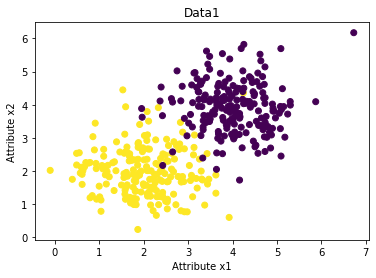

In [6]:
import matplotlib.pyplot as plt
plt.scatter(Data1_X[:,0],Data1_X[:,1], c=Data1_Y)
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Data1')
plt.show()


__Data2__ has four groups of points in $R^2$ with some small overlap. The two attributes are x1 and x2. Groups that are diagonally located belongs to the same class. 

- Data points are in variable Data2_X with 800 rows and 2 columns
- Class labels are in a variable Data2_Y with 800 rows and 1 column

In [7]:
np.random.seed(100)

a1 = np.random.multivariate_normal([2,2],[[0.25,0], [0,0.25]],200)
a2 = np.random.multivariate_normal([2,4],[[0.25,0], [0,0.25]],200)
a3 = np.random.multivariate_normal([4,2],[[0.25,0], [0,0.25]],200)
a4 = np.random.multivariate_normal([4,4],[[0.25,0], [0,0.25]],200)

Data2_X = np.vstack((a1,a4,a2,a3))
Data2_Y = np.hstack((np.ones(400).T,np.zeros(400).T)).astype(int)

<span style="color:red">**Question 1b:** </span> Plot the data to show the geometric view of the points in Data2. 

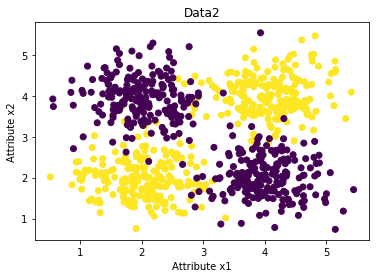

In [11]:
plt.scatter(Data2_X[:,0],Data2_X[:,1], c= Data2_Y)
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Data2')
plt.show()

__Data3__ has points in $R^2$. The two attributes are x1 and x2. Data points from the 'yellow' class in the range $4 < x1 < 6 $ and $4 < x2 < 6 $. Points in the blue class are in the range $0 < x1 < 10 $ and $0 < x2 < 10$

- Data points are in variable Data3_X with 400 rows and 2 columns
- Class labels are in a variable Data3_Y with 400 rows and 1 column

In [12]:
np.random.seed(100)

a1 = np.random.uniform(4,6,[200,2])
a2 = np.random.uniform(0,10,[200,2])

Data3_X = np.vstack((a1,a2))
Data3_Y = np.hstack((np.ones(200).T,np.zeros(200).T)).astype(int)

<span style="color:red">**Question 1c:** </span> Plot the data to show the geometric view of the points in Data3. 

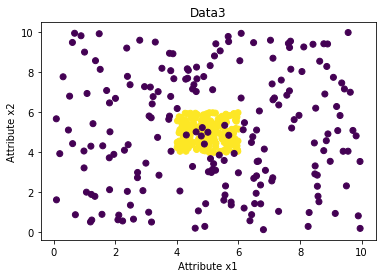

In [13]:
plt.scatter(Data3_X[:,0],Data3_X[:,1], c=Data3_Y)
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Data3')
plt.show()

__Data4__ has points in $R^2$. The two attributes are x1 and x2. Data points from the 'blue' class are within a distance 10 from the origin, other points belong to 'yellow' class.

- Data points are in variable Data4_X with 400 rows and 2 columns
- Class labels are in a variable Data4_Y with 400 rows and 1 column

In [14]:
np.random.seed(100)

Data4_X = np.random.uniform(0,12,[500,2])
Data4_Y = np.ones([500]).astype(int)
Data4_Y[np.multiply(Data4_X[:,0],Data4_X[:,0]) + np.multiply(Data4_X[:,1],Data4_X[:,1]) - 100 < 0 ] = 0

<span style="color:red">**Question 1d:** </span> Plot the data to show the geometric view of the points in Data4. 

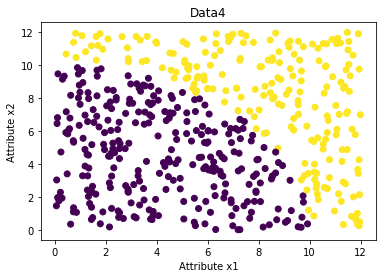

In [15]:
plt.scatter(Data4_X[:,0],Data4_X[:,1], c=Data4_Y)
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Data4')
plt.show()

### 2. Running Classification Algorithms, Computing Cross-validation Accuracy

__ <span style="color:maroon">We will use Data1 for illustration in this part.</span>__

__ Learning a Decision Tree classifier and computing k-fold accuracy.__

<span style="color:red">**Question 2a:** </span> Create an instance of a Decision Tree Classifier, use arguments max_depth=2 to indicate that the tree can grow upto depth 2.

In [8]:
dt = DecisionTreeClassifier(max_depth=2)

<span style="color:red">**Question 2b:** </span> Compute 30-fold cross-validation accuracy using the decision tree classifier.

In [9]:
dt_scores = cross_val_score(dt, Data2_X, Data2_Y, cv=30, scoring='accuracy')
print(dt_scores)

[0.92857143 0.96428571 0.96428571 0.75       0.92857143 0.96428571
 0.92857143 0.85714286 0.92857143 0.53571429 0.92307692 0.53846154
 0.92307692 0.92307692 0.65384615 0.34615385 0.30769231 0.57692308
 0.34615385 0.30769231 0.30769231 0.34615385 0.42307692 0.19230769
 0.19230769 0.11538462 0.30769231 0.42307692 0.23076923 0.19230769]


<span style="color:red">**Question 2c:** </span> What are the mean and standard deviation of cross validation accuracies obtained? What does the mean and standard deviation tell about the performance?

In [10]:
[dt_scores.mean(), dt_scores.std()]

[0.5775641025641025, 0.29974838444408874]

<span style="color:green">**Answer:** </span> Mean is 0.5775641025641025 and standard deviation is 0.29974838444408874.<br>
Mean of the cross-validation accuracy estimates the overall performance and standard deviation (std) captures the instability across folds


__Learning a k-Nearest Neighbor classifier and computing k-fold accuracy.__

<span style="color:red">**Question 2d:** </span> Create an instance of a kNN Classifier, use arguments n_neighbors=3 to indicate the #neighbors to be considered.

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)

<span style="color:red">**Question 2e:** </span> Compute 30-fold cross-validation accuracy using the knn classifier. Also, compute mean and standard deviation of the cross-validation accuracy.

In [12]:
knn_scores = cross_val_score(knn, Data2_X, Data2_Y, cv=30, scoring='accuracy')
[knn_scores.mean(), knn_scores.std()]

[0.9263736263736264, 0.046893600644729395]

__Learning a Naive Bayes classifier and computing k-fold accuracy.__

<span style="color:red">**Question 2f:** </span> Create an instance of a NB Classifier.

In [13]:
nb = GaussianNB()

<span style="color:red">**Question 2g:** </span> Compute 30-fold cross-validation accuracy using the NB classifier. Also, compute mean and standard deviation of the cross-validation accuracy.

In [14]:
nb_scores = cross_val_score(nb, Data2_X, Data2_Y, cv=30, scoring='accuracy')
[nb_scores.mean(), nb_scores.std()]

[0.21327838827838833, 0.09571191833045968]

In [15]:
#Precision-recall cell



__Learning a 'linear' SVM and computing k-fold accuracy.__

<span style="color:red">**Question 2h:** </span> Compute 30-fold cross-validation accuracy using the linear SVM classifier. Also, compute mean and standard deviation of the cross-validation accuracy.

First we create an instance of a linear SVM Classifier, use arguments C = 0.5 and Kernel = 'linear'.

In [16]:
svm_linear = SVC(C=0.5, kernel='linear')

In [17]:
svm_linear_scores = cross_val_score(svm_linear, Data2_X, Data2_Y, cv=30, scoring='accuracy')
[svm_linear_scores.mean(), svm_linear_scores.std()]

[0.4145604395604396, 0.09457454990469244]

__Learning a polynomial kernel SVM and computing k-fold accuracy.__

<span style="color:red">**Question 2i:** </span> Create an instance of a 'polynomial' SVM Classifier, use arguments C = 0.5, Kernel = 'poly' and degree=4 to indicate that the kernel is a polynomial kernel with a degree 4.

In [18]:
svm_poly = SVC(C=0.5, kernel='poly',degree=4, gamma = 'auto')

<span style="color:red">**Question 2j:** </span> Compute 30-fold cross-validation accuracy using the polynomial SVM classifier. Also, compute mean and standard deviation of the cross-validation accuracy.

In [19]:
svm_poly_scores = cross_val_score(svm_poly, Data2_X, Data2_Y, cv=30, scoring='accuracy')
[svm_poly_scores.mean(), svm_poly_scores.std()]

[0.8923992673992672, 0.05503693477818761]

__Learning an RBF kernel SVM and computing k-fold accuracy.__

<span style="color:red">**Question 2k:** </span> Create an instance of an RBF Kernel SVM Classifier, use arguments C = 0.5, Kernel = 'rbf' and gamma=0.1 to indicate that the kernel is RBF and with a large spread $\sigma = 1/\gamma = 1/0.1 = 10$.

In [20]:
svm_rbf = SVC(C = 0.5, kernel='rbf', gamma=0.1) 

<span style="color:red">**Question 2l:** </span> Compute 30-fold cross-validation accuracy using the RBF kernel SVM classifier. Also, compute mean and standard deviation of the cross-validation accuracy.

In [21]:
svm_rbf_scores = cross_val_score(svm_rbf, Data2_X, Data2_Y, cv=30, scoring='accuracy')
[svm_rbf_scores.mean(), svm_rbf_scores.std()]

[0.9401098901098899, 0.044617279232223715]

__Comparing cross-validation accuracies for different classifiers__

<span style="color:red">**Question 2m:** </span> Plots the histograms for 30-fold cross-validation accuracies for DT, kNN, NB, SVM (linear kernel), SVM (polynomial kernel), and SVM (RBF Kernel).

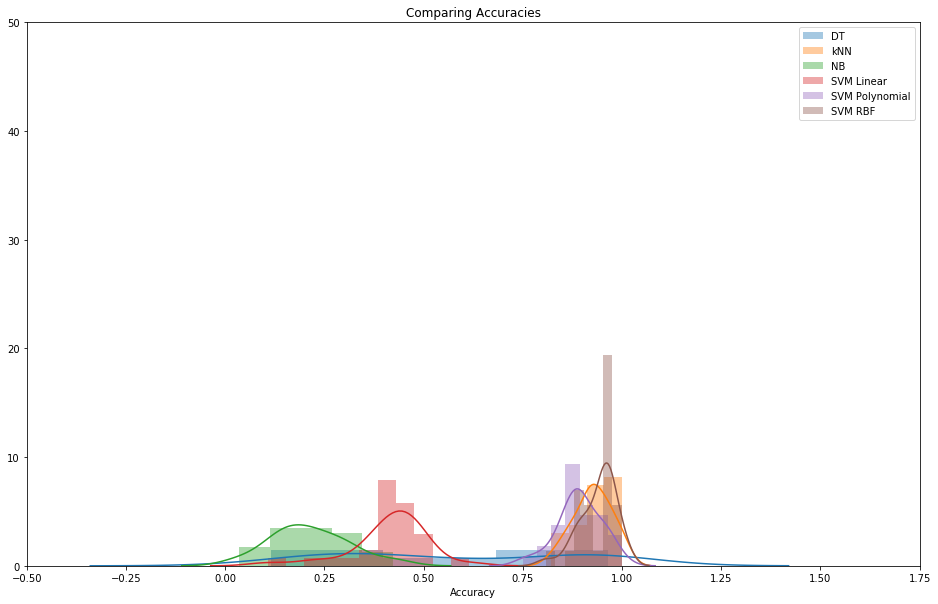

In [30]:
plt.figure(figsize=(16, 10))
plt.ylim(0,50.0)
plt.xlim(-0.5,1.75)
sns.distplot(dt_scores,label='DT');
sns.distplot(knn_scores,label='kNN');
sns.distplot(nb_scores,label='NB');
sns.distplot(svm_linear_scores,label='SVM Linear');
sns.distplot(svm_poly_scores,label='SVM Polynomial');
ax=sns.distplot(svm_rbf_scores,label='SVM RBF');
ax.set(xlabel='Accuracy', title='Comparing Accuracies')
ax.legend()
plt.show()

__Comparing cross-validation ROC scores for different classifiers__

<span style="color:red">**Question 2m:** </span> Plots the histograms for 30-fold cross-validation AUC scores for DT, kNN, NB, SVM (linear kernel), SVM (polynomial kernel), and SVM (RBF Kernel).

In [31]:
dt_scores = cross_val_score(dt, Data2_X, Data2_Y, cv=30, scoring='roc_auc')
knn_scores = cross_val_score(knn, Data2_X, Data2_Y, cv=30, scoring='roc_auc')
nb_scores = cross_val_score(nb, Data2_X, Data2_Y, cv=30, scoring='roc_auc')
svm_linear_scores = cross_val_score(svm_linear, Data2_X, Data2_Y, cv=30, scoring='roc_auc')
svm_poly_scores = cross_val_score(svm_poly, Data2_X, Data2_Y, cv=30, scoring='roc_auc')
svm_rbf_scores = cross_val_score(svm_rbf, Data2_X, Data2_Y, cv=30, scoring='roc_auc')

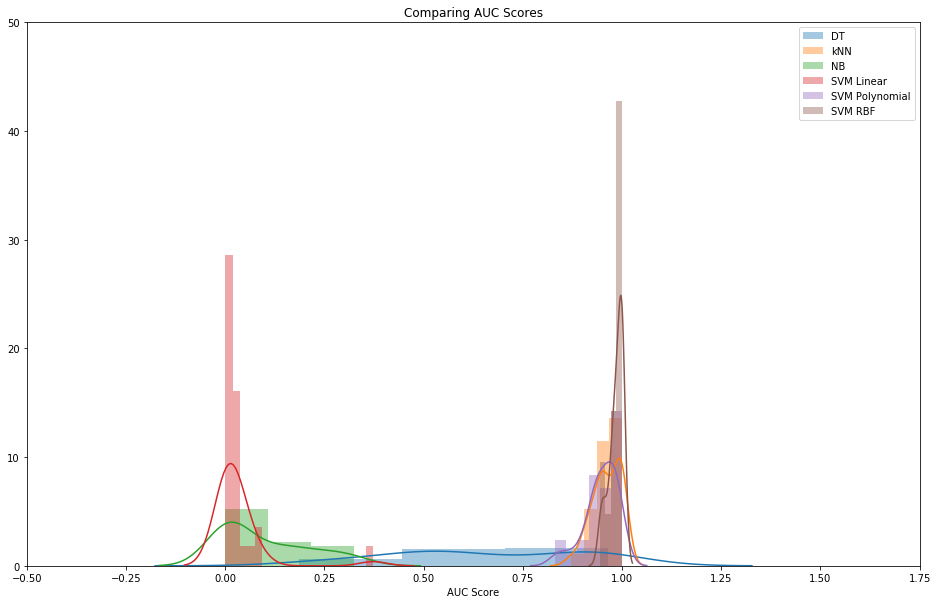

In [32]:
plt.figure(figsize=(16, 10))
plt.ylim(0,50.0)
plt.xlim(-0.5,1.75)

sns.distplot(dt_scores,label='DT');
sns.distplot(knn_scores,label='kNN');
sns.distplot(nb_scores,label='NB');
sns.distplot(svm_linear_scores,label='SVM Linear');
sns.distplot(svm_poly_scores,label='SVM Polynomial');
ax=sns.distplot(svm_rbf_scores,label='SVM RBF');
ax.set(xlabel='AUC Score', title='Comparing AUC Scores')
ax.legend()
plt.show()

### 3. Plotting decision boundaries to understand the classification model

<span style="color:red">**Question 3a:** </span> Visualize decision boundaries for SVM with polynomail kernel (degree=5) on Data1 using plot_decision_regions() from mlxtend. 

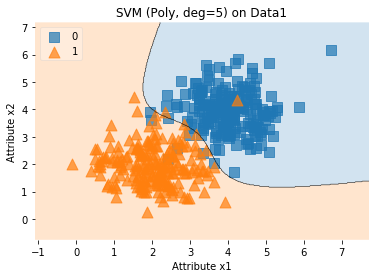

In [33]:
# Training a classifier
svm_poly_5 = SVC(C=0.5, kernel='poly', degree = 5, gamma = 'auto')
svm_poly_5.fit(Data1_X, Data1_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data1_X, y=Data1_Y, clf=svm_poly_5, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('SVM (Poly, deg=5) on Data1')


<span style="color:red">**Question 3b:** </span> Plot the decision boundaries for multiple models: consider SVM with polynomial kernel with degree 2, 3,4, and 5.

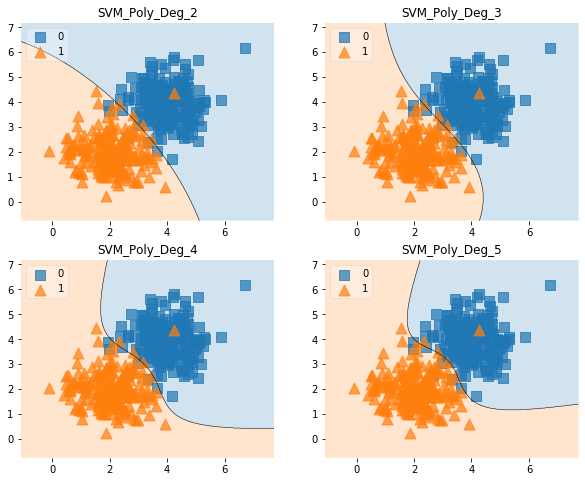

In [34]:
# Creating one instance for each degree of the polynomial kernel
svm_poly_2 = SVC(C=0.5, kernel='poly', degree = 2, gamma = 'auto')
svm_poly_3 = SVC(C=0.5, kernel='poly', degree = 3, gamma = 'auto')
svm_poly_4 = SVC(C=0.5, kernel='poly', degree = 4, gamma = 'auto')
svm_poly_5 = SVC(C=0.5, kernel='poly', degree = 5, gamma = 'auto')

# Creating a list of classifiers and their names for plotting
clf_list = [svm_poly_2,svm_poly_3,svm_poly_4,svm_poly_5]
labels = ['SVM_Poly_Deg_2','SVM_Poly_Deg_3','SVM_Poly_Deg_4','SVM_Poly_Deg_5']

# Plotting the decision boundaries
fig = plt.figure(figsize=(10,8))
count = 0;

for clf, label in zip(clf_list, labels):
    count = count + 1;
    clf.fit(Data1_X, Data1_Y)
    ax = plt.subplot(2,2,count)
    fig = plot_decision_regions(X=Data1_X, y=Data1_Y, clf=clf, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)

    plt.title(label)
plt.show()

### 4. Bagging

__ <span style="color:maroon">We will use Data2 for illustration in this part.</span>__

Bagging stands for bootstrap aggregation. One way to reduce the variance of an estimate is to average together multiple estimates. For example, we can train $M$ different decision trees $f_m$ on different subsets of the data (chosen randomly with replacement) and compute the ensemble: $$f(x) = \frac{1}{M} \sum_{m=1}^M f_m(x)$$

Bagging uses bootstrap sampling to obtain the data subsets for training the base learners. For aggregating the outputs of base learners, bagging uses voting for classification.

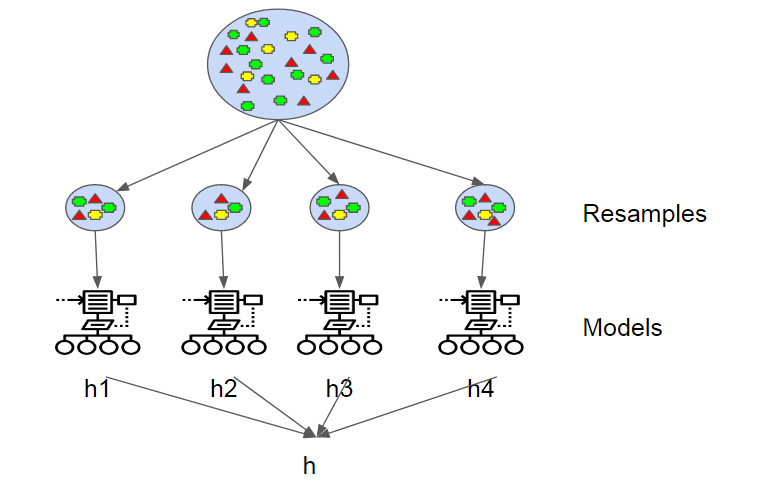

We create bagging classifiers where each member of the bag is a decision tree built on a bootstrap sample. We can choose the number of members in each bag using 'n_estimators'. We consider n_estimators = 1,2,3,4,5,10,20, and 40 to study the impact of this number on overall performance. 

<span style="color:red">**Question 4a:** </span> Compute the mean accuracy and standard deviation for each bagging classifier. While we are generally interested in accuracy to estimate classification performance, here it is useful to consider standard deviation. This is particularly because the advantage of bagging is to reduce the 'variance' in the models. This can be estimated using std of the cross-validation accuracies.

In [35]:
dt = DecisionTreeClassifier(max_depth=2);
n_est_list = [1,2,3,4,5,10,20,40]
for n_est in n_est_list:
    # create an instance of bagging classifier with 'n_est' estimators
    bagging = BaggingClassifier(base_estimator=dt, n_estimators=n_est)
    # compute cross-validation accuracy for each bagging classifier
    scores = cross_val_score(bagging, Data2_X, Data2_Y, cv=10, scoring='accuracy')
    print("Bagging Accuracy: %.2f (+/- %.2f) #estimators: %d" % (scores.mean(), scores.std(), n_est)) 

Bagging Accuracy: 0.75 (+/- 0.15) #estimators: 1
Bagging Accuracy: 0.88 (+/- 0.06) #estimators: 2
Bagging Accuracy: 0.86 (+/- 0.06) #estimators: 3
Bagging Accuracy: 0.89 (+/- 0.02) #estimators: 4
Bagging Accuracy: 0.91 (+/- 0.03) #estimators: 5
Bagging Accuracy: 0.88 (+/- 0.05) #estimators: 10
Bagging Accuracy: 0.89 (+/- 0.03) #estimators: 20
Bagging Accuracy: 0.89 (+/- 0.03) #estimators: 40


Observations:

- Notice that accuracy increases significanlty as the number of estimators are increased from 1 to 2. 
- Similarly the standard deviation falls significantly as the number of estimators are increased from 1 to 2. 


<span style="color:red">**Question 4b:** </span> Visualize the decision boundaries to study the nature of decision boundaries as the number of estimators in the bag are increasing.

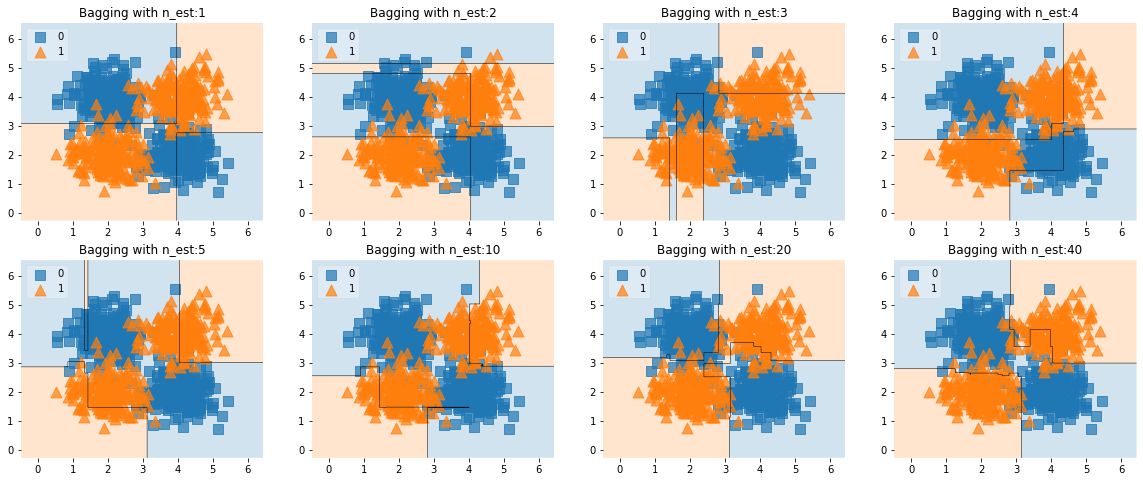

In [36]:
fig = plt.figure(figsize=(20, 8))
count = 0;
for n_est in n_est_list:
    count = count + 1;
    bagging = BaggingClassifier(base_estimator=dt, n_estimators=n_est)
    bagging.fit(Data2_X, Data2_Y)
    ax = plt.subplot(2,4,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=bagging, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title('Bagging with n_est:'+str(n_est))
    
plt.show()

### 5. Boosting

__ <span style="color:maroon">We will use Data4 for illustration in this part.</span>__

Boosting refers to a family of algorithms that are able to convert weak learners to strong learners.

- The main principle of boosting is to fit a sequence of weak learners (models that are only slightly better than random guessing, such as small decision trees) to weighted versions of the data, where more weight is given to examples that were mis-classified by earlier rounds.
- The predictions are then combined through a weighted majority vote (classification) or a weighted sum (regression) to produce the final prediction.

The principal difference between boosting and bagging is that base learners are trained in sequence on a weighted version of the data.

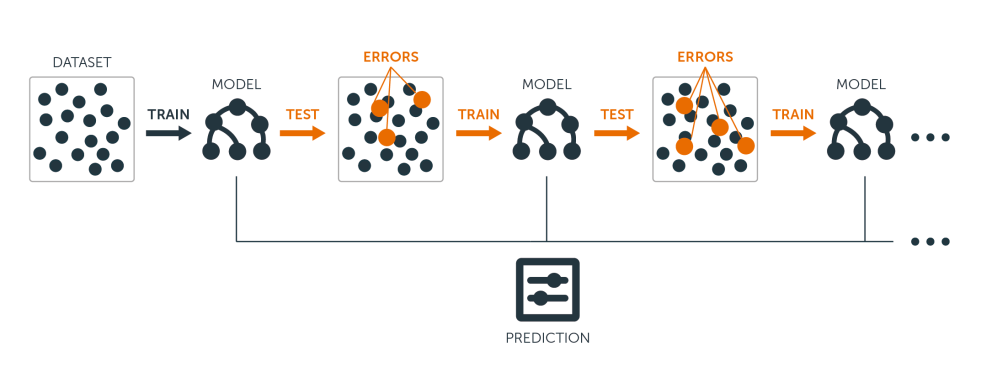

<span style="color:red">**Question 5a:** </span> Compute the cross-validation accuracy of boosting classifier with increasing number of DT base classifiers, use n_estimators = 1,2,3,4,5,10,20,and 40.

In [37]:
dt = DecisionTreeClassifier(max_depth=2)
n_est_list = [1,2,3,4,5,10,20,40]
for n_est in n_est_list:
    # create an instance of a boosting classifier with 'n_est' estimators
    boosting = AdaBoostClassifier(base_estimator=dt, n_estimators=n_est)
    # compute cross-validation accuracy for each bagging classifier
    scores = cross_val_score(boosting, Data4_X, Data4_Y, cv=10, scoring='accuracy')
    print("Boosting Accuracy: %.2f (+/- %.2f) #estimators: %d" % (scores.mean(), scores.std(), n_est)) 

Boosting Accuracy: 0.88 (+/- 0.04) #estimators: 1
Boosting Accuracy: 0.92 (+/- 0.03) #estimators: 2
Boosting Accuracy: 0.96 (+/- 0.02) #estimators: 3
Boosting Accuracy: 0.97 (+/- 0.01) #estimators: 4
Boosting Accuracy: 0.97 (+/- 0.02) #estimators: 5
Boosting Accuracy: 0.97 (+/- 0.02) #estimators: 10
Boosting Accuracy: 0.96 (+/- 0.02) #estimators: 20
Boosting Accuracy: 0.98 (+/- 0.02) #estimators: 40


As the number of base classifiers are increased from 1, the performance of the boosting classifier increased too.

<span style="color:red">**Question 5b:** </span> Visualize the decision boundaries for boosting classifier and comment on the nature of decision boundary as n_estimators increase.

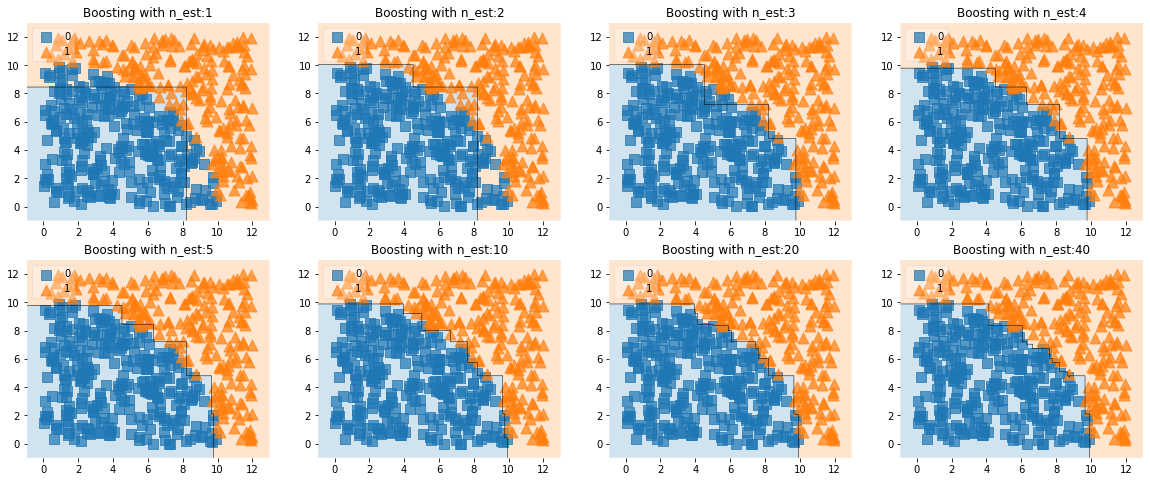

In [38]:
fig = plt.figure(figsize=(20, 8))
count = 0;
for n_est in n_est_list:
    count = count + 1;
    boosting = AdaBoostClassifier(base_estimator=dt, n_estimators=n_est)
    boosting.fit(Data4_X, Data4_Y)
    ax = plt.subplot(2,4,count)
    fig = plot_decision_regions(X=Data4_X, y=Data4_Y, clf=boosting, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title('Boosting with n_est:'+str(n_est))
    
plt.show()

<span style="color:green">**Answer:** </span>  When only one estimator is used, the boundary is very crude approximation of the curvature that separates the two classes. As the number of base classifiers increased, particularly at 40, the boundary is a much better approximation of the separation between the two classes.